# The rainfall-runoff process

*Rainfall-runoff hydrology* (NL: *afvoerhydrologie*) is the description of the movement of water from the moment *precipitation* $P$ (NL: *neerslag*) reaches the Earth's surface until the water flows into a lake or sea. Rainfall-runoff describes the portion (see {numref}`6.1-hydrologicalcycle`) of the hydrological cycle that takes place on or below the Earth's surface, focusing primarily on the inflow of water into streams and the runoff behavior (how much water at what time) in those streams.


```{figure} ../images/RFR_processes_landfluxes.png
---
height: 400px
name: 6.1-hydrologicalcycle
---
Schematization of fluxes of hydrological cycle on land surface. (Own work)
```

Rainfall-runoff typically deals with runoff processes on a larger scale, such as river flows resulting from precipitation in an entire *watershed* (NL: *stroomgebied*). The behavior of runoff is determined by many factors that influence the relationship between water input (precipitation, snowmelt, artificial water input) and *discharge* $Q$ (NL: *afvoer*) behavior. Often, the most important aspect in engineering is determining the maximum river discharge (peak discharge) resulting from a specific precipitation pattern. Over time, numerous methods and models have been developed to predict the discharge behavior over time or the maximum discharge.

The most reliable information about the magnitude of flow rates, both now and in the future, is likely to be obtained from measurements. In this case, predictions are made based on past measurement data. The system in which rainfall-runoff occurs is so complex that the use of models or theoretical approaches alone can only provide an indication of the runoff regime of a *catchment* (NL: *stroomgebied*). A combination of atmospheric conditions, geological and geomorphological conditions, soil and vegetation, and human activities is responsible for the runoff behavior. As a result, a particular rainfall event may cause significant runoff in one area, while producing little to no runoff in another seemingly similar area.

(types-of-runoff)=

## Types of rainfall-runoff processes

We distinguish the following rainfall-runoff processes:

- *Saturation excess overland flow* (NL: *Verzadigde oppervlakteafvoer*) or *Dunne overland flow* {cite:p}`Dunne-1983` occurs when a saturated zone builds up above an impermeable layer or when the water table rises to the surface. This often happens in valleys or in areas where the upper layer of soil is relatively thin, such as hillsides.

- *Infiltration excess overland flow* or *Hortonian overland flow* (NL: *Hortonse oppervlakteafvoer*) {cite:p}`horton-1945` occurs when the intensity of rainfall exceeds the infiltration capacity. This results in the formation of a thin sheet of water on the surface, causing water to be ran off over the surface. 

Both types of overland flows are usually referred to as *surface runoff* $Q_s$, but the mechanisms can thus be quite different.

- The term *rapid sub-surface flow* or *interflow* or *shallow groundwater flow* is used when water infiltrates and quickly percolates through the presence of macropores, such as tree roots or animal burrows. The water then enters a temporarily saturated subsurface layer, allowing it to rapidly flow towards a watercourse. This process is faster and generates larger discharges than regular groundwater flow.

- *Groundwater flow* $Q_g$ or *base flow* $Q_b$ (NL: *Grondwaterstroming*) refers to the saturated inflow of groundwater and is a slow component that contributes to the base flow of a river.

All runoff processes can occur simultaneously within a small area during the same rainfall event. Additionally, the specific process that occurs can vary from one location to another. The significant variation in the characteristics of hydrological processes makes their description a complex matter, and models can only approximate the true situation.

## Rainfall excess 

The term "rainfall excess" or "direct runoff" refers to the portion of precipitation that ultimately leads to larger river discharges as a result of a rainfall event. The following processes contribute to a portion of the precipitation not or only much later contributing to runoff, resulting in a loss term in relation to the discharge:

- *Interception* $E_i$ (NL: *interceptie*): refers to the amount of water that does not reach the drainage system because it is captured by vegetation and the land surface, where it directly evaporates.

- *Storage* $S$ (NL: *Berging*): in depressions such as lakes, swamps, and also on a smaller scale, such as hollows, a significant amount of water can be temporarily stored.

- *Infiltration* $I$ (NL: *infiltratie*): typically represents the largest component in the rainfall-runoff balance. It can make a significant difference in the runoff behavior whether the catchment has a high infiltration capacity or whether the area routes all the water over the surface.


## River discharge components and determining factors

River discharges consist of the components of surface, sub-surface and groundwater flow components. In practice, it is difficult to make a clear distinction between these components. The contributions of the components depend on the precipitation pattern and the characteristics of the catchment. In a steep catchment with low infiltration capacity, surface runoff makes a significant contribution to the river discharge after prolonged rainfall. In flat areas with high infiltration capacity, even moderate rainfall intensities do not result in surface runoff. This is the case in most parts of the Netherlands. However, runoff discharge may still increase rapidly due to accelerated groundwater runoff. Particularly, in intensively drained areas, groundwater flows relatively quickly. During periods without rainfall, fast runoff processes are absent, but there can still be slow groundwater flow known as base flow.




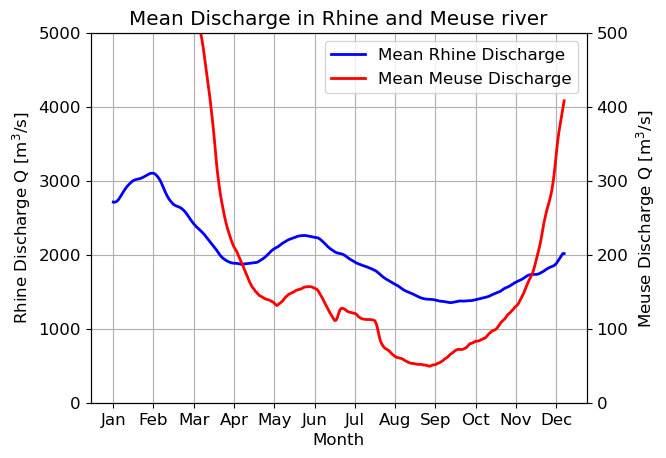

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

#get data for Meuse
data_m = pd.read_csv('../datasets/20230815_017.csv', delimiter=';', 
                     usecols=['MEETPUNT_IDENTIFICATIE','WAARNEMINGDATUM', 
                              'WAARNEMINGTIJD (MET/CET)', 'NUMERIEKEWAARDE'], decimal=',')
grouped_m = data_m.groupby(data_m.MEETPUNT_IDENTIFICATIE)
locations_m = data_m['MEETPUNT_IDENTIFICATIE'].unique()
df_meuse = grouped_m.get_group(locations_m[1])

# Modify the line below to handle the date format without space
df_meuse['datetime'] = pd.to_datetime(df_meuse['WAARNEMINGDATUM'] + ' ' + df_meuse['WAARNEMINGTIJD (MET/CET)'], format='%d-%m-%Y %H:%M:%S')
df_meuse['NUMERIEKEWAARDE'] = pd.to_numeric(df_meuse['NUMERIEKEWAARDE'], errors='coerce')  # Convert to numeric
df_meuse.set_index('datetime', inplace=True)
daily_avg_meuse = df_meuse.groupby(df_meuse.index.dayofyear)['NUMERIEKEWAARDE'].mean()  #take mean value per day of the year
ma_daily_meuse = daily_avg_meuse.rolling(30).mean() #take moving average of 30 days

#get data for Rhine
data_r = pd.read_csv('../datasets/20230815_032.csv', delimiter=';', 
                     usecols=['MEETPUNT_IDENTIFICATIE','WAARNEMINGDATUM', 
                              'WAARNEMINGTIJD (MET/CET)', 'ALFANUMERIEKEWAARDE'])
grouped_r = data_r.groupby(data_r.MEETPUNT_IDENTIFICATIE)
locations_r = data_r['MEETPUNT_IDENTIFICATIE'].unique()
df_rhine = grouped_r.get_group(locations_r[1])
df_rhine['ALFANUMERIEKEWAARDE'] = pd.to_numeric(df_rhine['ALFANUMERIEKEWAARDE'], errors='coerce')
df_rhine = df_rhine[df_rhine['ALFANUMERIEKEWAARDE'] < 1e6] #remove outliers
df_rhine = df_rhine.groupby(df_rhine.WAARNEMINGDATUM)['ALFANUMERIEKEWAARDE'].mean().reset_index()
# df_rhine['datetime'] = pd.to_datetime(df_rhine['WAARNEMINGDATUM'])  # Convert to numeric
df_rhine['datetime'] = pd.to_datetime(df_rhine['WAARNEMINGDATUM'].astype(str), dayfirst=True)
df_rhine.set_index('datetime', inplace=True)
df_rhine = df_rhine.sort_values(by='datetime')
df_rhine_day = df_rhine['ALFANUMERIEKEWAARDE'].resample('D').mean()
daily_avg_rhine = df_rhine_day.groupby(df_rhine_day.index.dayofyear).mean() #take mean value per day of the year
ma_daily_rhine = daily_avg_rhine.rolling(30).mean()  #take moving average of 30 days

# create plots
fig, ax = plt.subplots()

ma_daily_rhine.plot(ax=ax, color='b', label='Mean Rhine Discharge')
ax.set_xlabel("Month")
ax.set_ylabel("Rhine Discharge Q [m$^3$/s]")
ax.set_ylim(0, 5000)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ma_daily_meuse.plot(ax=ax2, color='r', label='Mean Meuse Discharge')
ax2.set_ylabel('Meuse Discharge Q [m$^3$/s]')
ax2.set_ylim(0, 500)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

#set xlabels to months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(30, 365, 30))  # Asssuming the index contains appropriate month values
ax.set_xticklabels(months)
ax.set_title('Mean Discharge in Rhine and Meuse river')
ax.grid()
# Rotate the labels for better visibility
plt.xticks(rotation=45)
plt.savefig('../images/RFR_processes_rhinemeuseriver.png')
# plt.close();


```{figure} ../images/RFR_processes_landfluxes.png
---
height: 0px
name: fig:rhine-meuse
---
Average discharge of the Rhine and Meuse rivers. (Own work)
```


{numref}`fig:rhine-meuse` shows the variation in average discharge for the *Rhine* (NL: *Rijn*) and the *Meuse* (NL: *Maas*) rivers. The plot is based on data obtained from [Rijkswaterstaat](https://waterinfo.rws.nl/#!/nav/bulkdownload/periode-selectie/). Discharge data could be downloaded for different periods and gauge stations in the Netherlands. With the provided code, the mean discharge can be calculated in Python. 

The Meuse exhibits much greater variation in discharge throughout the year compared to the Rhine. This is because the Meuse is a rain-fed river, while the Rhine is considered a mixed river. The origin of the Rhine lies in a glaciated area where precipitation (snow) is temporarily stored and slowly released as runoff in spring.

In hydrology, the following types of rivers are distinguished:

- *Perennial* (NL: *Permanente*) rivers: rivers that flow throughout the year (e.g., the Rhine and the Meuse).

- *Intermittent* (NL: *Droogvallende*) rivers: rivers that only flow during the wet season (many smaller streams in the Netherlands).

- *Ephemeral rivers* (NL: *Wadi's*): rivers that only flow after heavy rainfall. The groundwater table is always lower than the riverbed in such rivers.


Discharge can be seen as the output of a system, the catchment or *watershed*, with climate as its input. The catchment can be described based on the characteristics of its surface:

- Topography (slopes, watershed, size)
- Vegetation
- Land management and land use
- Impervious surfaces
- The subsurface, which is determined by the geological structure

Therefore, modeling a catchment starts with collecting accurate map materials, including:

- Topographic maps
- Land use maps
- Demographic maps (urban areas)
- Geological maps
- Soil maps

Remote sensing imagery can also be used in this context. Recent changes in an area can be quickly detected and processed using such imagery. In addition to map materials, field observations are always necessary as they often provide essential information. The infiltration capacity of an area often proves to be of great importance for the behavior of river discharges. For example, if human activities (such as increasing the size of impervious surfaces) reduce the infiltration capacity, it can result in a significant increase in river discharge and an earlier occurrence of peak flows.

## Annual rainfall runoff

When an annual balance is created for the rainfall-runoff process, it can be assumed that storage is negligible (remember from Budyko in {numref}`Budyko-chapter`). In this case, the precipitation $P$ is divided into evaporation $E$, surface runoff $Q_s$, and groundwater runoff $Q_g$ ({numref}`Qgcontribution`). If groundwater emerges completely within the catchment (exfiltration), the groundwater term is eliminated, and the precipitation is equal to evaporation and surface runoff ({numref}`nocontributionQg`). However, if there is groundwater inflow $Q_{gi}$ beneath the topographic watershed, it must be included as an incoming term in the balance ({numref}`doublecontribution`).

```{figure} ../images/RFR_processes_anualrr.png
---
height: 300px
name: Qgcontribution
width: 600px
---
Annual water balance for rainfall-runoff process: $P = E + Q_s + Q_g$. (Own work)
```
```{figure} ../images/RFR_processes_anualrrcorres.png
---
height: 300px
name: nocontributionQg
width: 600px
---
Annual water balance for rainfall-runoff process with corresponding divide of surface water and groundwater: $P = E + Q_s$. (Own work)
```
```{figure} ../images/RFR_processes_anualrrnocorres.png
---
height: 300px
name: doublecontribution
width: 600px
---
Annual water balance for rainfall-runoff process with non-corresponding divide of surface water and groundwater: $P + Q_\text{gi} = E + Q_s + Q_g$. (Own work)
```

(relationship-between-rainfall-and-runoff)=
### Relationship between rainfall and runoff

When considering the rainfall-runoff relationship on an annual basis, it is necessary to determine the start and end points of the year. Generally, the division is not based on the calendar year but rather on the point where the average streamflows are the smallest. This is because the differences in storage between the beginning and end of such a year are also the smallest. Such a chosen year is referred to as a hydrological river year, and in the Dutch climate, a river year starts on October 1st or November 1st (note that this differs from the hydrological year of groundwater which starts on April 1st). A relationship between rainfall and runoff on an annual basis can be obtained if a series of years' worth of rainfall and runoff data is available. However, often this data is incomplete, usually lacking the runoff data. In such cases, established relationships for nearby catchments or for upstream or downstream gauging stations can be used, but caution must be exercised. Underground inflow and/or outflow can vary significantly between areas and thus lead to different relationships.


## The baseflow

The baseflow is the flow that is largely independent of rainfall events. At the end of dry periods, minimum flows occur, which are solely caused by the baseflow (also known as recession flow or dry-weather flow). The flow is then sustained by the depletion of one or more storage forms. The water can be stored in the following ways:

1. Groundwater
2. Surface waters:
   - a) Natural: lakes, wetlands, and the rivers themselves
   - b) Artificial: reservoirs closed off by dams
3. Snow accumulation

The mechanism of baseflow operates as follows: as the flow decreases, the stored quantities decrease. For storage forms 1 and 2a, there is a natural relationship between the flow $Q$ and the stored quantity $S$ at a given moment. The smaller the stored quantity, the lower the flow $Q$. These storage forms can be seen as reservoirs that gradually deplete, and there is a fixed relationship between $Q$ and $S$, for example:

$$
S = kQ^n \quad \text{[L$^3$]} 
$$ (storage)

Here, $k$ is the reservoir coefficient, and its significance for rivers is discussed in the following paragraphs. For groundwater reservoirs, it is often the case that $n$ = 1, meaning the groundwater storage functions as a linear reservoir, and $k$ [T] represents the average residence time of the water.

For storage form 2b, the relationship between the stored quantity $S$ and the flow $Q$ is mainly governed by the operation of gates and weirs. In the case of storage form 3, the flow $Q$ is strongly influenced by weather conditions (solar radiation and temperature) in addition to the remaining snowpack. In the following discussion, we will focus exclusively on the depletion of groundwater reserves.

### Depletion of the groundwater reservoir

The flow pattern resulting from the depletion of the groundwater reserve is most pronounced in climates where there is an annual rainy season that lasts only a few months. The characteristic flow pattern for such climates is shown in {numref}`afvoerverloop1regenperiode`.


```{figure} ../images/RFR_processes_monoflux.png
---
height: 300px
name: afvoerverloop1regenperiode
---
Characteristics of river discharge in a climate with a single annual rainy season – photo from {cite:p}`instropicsEVA`.
```

The decrease in flow during the dry season can occur at different rates, as illustrated in {numref}`uitputtingsverloopgrondwaterreservoir`

```{figure} ../images/RFR_processes_depletionresev.png
---
height: 300px
name: uitputtingsverloopgrondwaterreservoir
---
Example depletion curves of a groundwater reservoir during dry periods – photo from {cite:p}`instropicsEVA`.
```

It is evident that the flow curve with a rapid depletion represents a highly responsive catchment. The rate of the flow decrease and the extent of groundwater depletion, reflected in the decline of groundwater levels, are determined by the following factors:

1. Catchment characteristics:
   - The nature of the drainage network or system of open water bodies (drainage density), determined by the density, distances $L$, and depth of rivers, streams, ditches, or drains.
   - The permeability or transmissivity $K_D$ of the subsurface (see {numref}`aquifers_soil`).
   - The storage coefficient $\mu$, which is equal to the porosity $p$ minus the moisture content at field capacity (specific retention) (see {numref}`modelling-phreatic-level`).

2. Evaporation: This primarily applies to shallow groundwater levels because, in addition to runoff, water is also extracted from the groundwater through capillary rise and evaporation of soil moisture. It can also be applied to catchments that have trees capable of tapping into the groundwater.

### Depletion patterns in reality

Despite the significant variation in watercourses and geohydrological conditions in catchment areas, measurements have shown that the depletion pattern of natural watercourses can often be approximated by the relationship:

$$
Q(t)=Q_0e^{\frac{-t}{k}} \quad \text{[L$^3$/T]}
$$ (discharge)

where $Q(t)$ represents the discharge at a time $t$ after the occurrence of discharge $Q_0$. The time at which the discharge $Q_0$ occurs can be arbitrarily chosen within the depletion pattern. 

{numref}`reservoircoeff` illustrates the meaning of the *reservoir coefficient* $k$ (also refer to {numref}`uitputtingsverloopgrondwaterreservoir`). Thus, $k$ represents a timescale for depleting a reservoir.

```{figure} ../images/RFR_processes_reservoircoefficientk.png
---
height: 300px
name: reservoircoeff
---
Derivation of reservoir coefficient $k$ from a discharge-time curve – photo from {cite:p}`instropicsEVA`.
```

In [52]:
# Note that the code cells below is used for the website only.

```{exercise-start}
:label: ex_discharge_eq
```
Use the fact that the groundwater storage functions as a linear reservoir to derive Eq. {eq}`discharge`.

```{exercise-end}
```

:::{dropdown} Answer&nbsp;{ref}`ex_discharge_eq`


```{dropdown} Step 1
$$
\text{process equation:} \hspace{2.0cm} S(t)=kQ(t) \hspace{1.8cm} \text{(n=1)} \hspace{2.7cm} \text{[L$^3$]}   
$$ (process)
```

```{dropdown} Step 2
$$
\text{water balance:} \hspace{2.5cm}      \frac{dS}{dt}=-Q(t)  \hspace{2cm}\text{because I=0} \hspace{1.5cm} \text{[L$^3$T$^{-1}$]}  
$$ (waterbalance)
```

```{dropdown} Step 3
$$
\text{substitution:} \hspace{2.7cm}   k\frac{dQ}{dt}+Q(t)=0 \hspace{4.7cm} \text{[L$^3$T$^{-1}$]}
$$ (substitution)
```

```{dropdown} Step 4
$$
\text{create a trial solution:} \hspace{2.2cm} Q(t)=Ae^{\lambda t} \hspace{5.1cm} \text{[L$^3$T$^{-1}$]}
$$ (maketrial)
```

```{dropdown} Step 5
First, find $\lambda$ by entering the trial solution into Eq. {eq}`substitution`:

$$
\text{enter trial solution:} \hspace{2.7cm} k \lambda A e^{\lambda t} + Ae^{\lambda t}=0 \hspace{4.7cm} \text{[L$^3$T$^{-1}$]}
$$ (entertrial)

$$
\text{solve for $\lambda$:} \hspace{2.2cm} \lambda=-\frac{1}{k} \hspace{5.1cm} \text{[L$^{-3}$]}
$$ (solvetrial)

Then we find $A$ by entering $t=0$ into Eq. {eq}`maketrial`:

$$
\text{enter $t=0$:} \hspace{2.2cm} Q(0)=Ae^{-\frac{0}{k}}=A \hspace{5.1cm} \text{[L$^3$T$^{-1}$]}
$$ (findA)

$$
\text{define $A$:} \hspace{2.2cm} A=Q(0)=Q_0 \hspace{5.1cm} \text{[L$^3$T$^{-1}$]}
$$ (defineA)
```

```{dropdown} Step 6
$$
\text{with $k$ constant:} \hspace{2.2cm} Q(t)=Q_0e^{\frac{-t}{k}} \hspace{5.1cm} \text{[L$^3$T$^{-1}$]} 
$$ (kconstant)
```
:::

### Example: Depletion curve

Using [discharge data](https://data.4tu.nl/articles/dataset/Mean_daily_observed_discharge_at_Lobith_Rhine_river_/12696785/1) from the Rhine river at Lobith we can fit the reservoir coefficient $k$. In {numref}`fig:discharge_rhine_k_values` we do this for two moments in the three year time period of this data set. Depending on the choice of $Q_0$ and time period for the fit we can obtain different values for $k$.

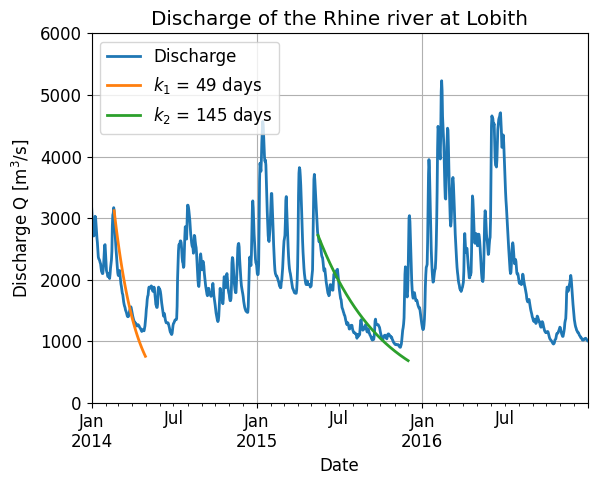

In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit # to fit parameters of a line
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

# load the data
df_rhine = pd.read_excel('../datasets/Rhine_Lobith.xlsx', parse_dates=True, index_col=0, skiprows=40)
df_rhine 

# determine reservoir coefficient k
def Qt(t, Q0, k):
    return Q0*np.exp(-t/k)

data_fit1 = df_rhine.iloc[50:120,0]
Q01 = data_fit1[0]
t1 = np.arange(0, len(data_fit1), 1)
k1 = curve_fit(Qt, t1, data_fit1, bounds=((Q01-0.0001, -np.inf),(Q01+0.0001, np.inf)))[0][1]   

data_fit2 = df_rhine.iloc[500:700,0]
Q02 = data_fit2[0]
t2 = np.arange(0, len(data_fit2), 1)
k2 = curve_fit(Qt, t2, data_fit2, bounds=((Q02-0.0001, -np.inf),(Q02+0.0001, np.inf)))[0][1]    

# check the fit of the depletion curve
dates1 = df_rhine.index[50:120]
dates2 = df_rhine.index[500:700]
fig = plt.figure()
df_rhine['Discharge'].plot()
plt.plot(dates1, Qt(t1,Q01,k1), label = f"$k_1$ = {k1:.0f} days")
plt.plot(dates2, Qt(t2,Q02,k2), label = f"$k_2$ = {k2:.0f} days")
plt.legend()
plt.ylim(0,6000)
plt.ylabel(r'Discharge Q [m$^3$/s]')
plt.xlabel('Date')
plt.title('Discharge of the Rhine river at Lobith')
plt.grid();

```{figure} ../images/RFR_processes_Reservoir_coefficient_k_for_different_Q0.png
---
height: 300px
name: fig:discharge_rhine_k_values
---
Reservoir coefficient $k$ for two different $Q_0$ and time periods. (Own work)
```

## Runoff from Precipitation

### "Losses"

As mentioned earlier, several loss processes can be identified regarding the runoff from precipitation (or: *effective precipitation*). Strictly speaking, there is no actual loss in the hydrological cycle since water is never truly lost. However, the term "loss" is often used when referring to specific mechanisms, such as river discharge. These "losses" represent the difference between the actual precipitation $P$ and the runoff from effective precipitation $P_a$, and they consist of:

- Evaporation $E_i$;
- Surface storage increase in the catchment $\displaystyle \frac{\mathrm{d}S_s}{\mathrm{d}t}$ or ponding;
- Infiltration $I$

```{note}
When we are looking at short timescales, infiltation is a loss. For longer timescales, however, infiltration is only a loss if it is evaporated by transpiration or soil evaporation, but it is not a loss if it recharges the groundwater and contributes to baseflow.
```


The effective precipitation is expressed as $P_a$ and can be calculated using the following equation:

$$
P_a=P-E_i-\frac{\mathrm{d}S_s}{\mathrm{d}t}-I \quad \text{[L/T]}
$$ (runoffprec)

The variation of the so-called "losses" (which actually represent interception, infiltration, and ponding) can be represented by the amount of effective precipitation $P_a$ as a function of the amount of precipitation $P$ ({numref}`relatieneerslagenafvoerbareneerslag`).

The behavior of the individual loss components strongly depends on the intensity and duration of a rainfall event and the characteristics of the catchment. {numref}`relatieneerslagenafvoerbareneerslag` shows that the proportion of "losses" decreases as the amount of precipitation increases. This is logical considering that the water retention capacity of an area decreases as more water is already retained.



In [54]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

# ------------------------------
# 0) SET A RENDERER COMPATIBLE WITH JUPYTERBOOK
# ------------------------------
pio.renderers.default = 'plotly_mimetype'
# Alternatively, 'notebook_connected' can also work for some JupyterBook setups.

# ------------------------------
# 1) MODEL: runoff vs precipitation
# ------------------------------
def runoff_curve(P, k=0.01):
    """
    Example runoff function:
        R(P) = P * (1 - exp(-k*P))
    Replace with your own formula if desired.
    """
    return P * (1.0 - np.exp(-k * P))

# ------------------------------
# 2) RANGE OF P AND k VALUES
# ------------------------------
P_vals = np.linspace(0, 100, 200)   # precipitation domain (0..100, abstract units)
k_values = [0.01, 0.02, 0.04, 0.08] # distinct parameter values
P_star = 60.0                       # point at which we draw vertical lines

# Precompute the runoff for each k
runoff_data = {k: runoff_curve(P_vals, k) for k in k_values}

# ------------------------------
# 3) BUILD FIGURE & LEGEND TRACES
# ------------------------------
fig = go.Figure()

# --- Add "dummy" traces for legend entries (so user sees them even when slider changes) ---
fig.add_trace(go.Scatter(
    x=[], y=[], mode='lines',
    line=dict(width=3, color='black', dash='dash'),
    name='Total precipitation (P)'
))
fig.add_trace(go.Scatter(
    x=[], y=[], mode='lines',
    line=dict(width=3, color='steelblue'),
    name='Runoff from precipitation'
))
fig.add_trace(go.Scatter(
    x=[], y=[], mode='lines',
    fill='tonexty',
    fillpattern=dict(shape='|'),
    line=dict(width=1, color='black'),
    name='Losses'
))

def make_traces_for_k(k):
    """Return three traces: dashed top line P, runoff curve, and the fill area for losses."""
    R_k = runoff_data[k]
    top_line = go.Scatter(
        x=P_vals,
        y=P_vals,
        mode='lines',
        line=dict(width=3, color='black', dash='dash'),
        showlegend=False
    )
    runoff_line = go.Scatter(
        x=P_vals,
        y=R_k,
        mode='lines',
        line=dict(width=3, color='steelblue'),
        showlegend=False
    )
    losses_area = go.Scatter(
        x=P_vals,
        y=P_vals,
        mode='lines',
        fill='tonexty',          # fill down to the next trace (runoff_line)
        fillpattern=dict(shape='|'),
        line=dict(width=1, color='black'),
        showlegend=False
    )
    return [top_line, runoff_line, losses_area]

start_idx = len(fig.data)
for k in k_values:
    tlist = make_traces_for_k(k)
    for t in tlist:
        t.visible = False
        fig.add_trace(t)

# ------------------------------
# 4) VERTICAL LINES (Losses & Runoff) FOR EACH k
# ------------------------------
lines_and_annots = {}
for k in k_values:
    R_array = runoff_data[k]
    idx_star = (np.abs(P_vals - P_star)).argmin()
    R_star = R_array[idx_star]
    
    shape_runoff = dict(
        type='line', xref='x', yref='y',
        x0=P_star, x1=P_star, y0=0, y1=R_star,
        line=dict(width=2, color='red', dash='dot')
    )
    shape_losses = dict(
        type='line', xref='x', yref='y',
        x0=P_star, x1=P_star, y0=R_star, y1=P_star,
        line=dict(width=2, color='green', dash='dot')
    )
    annot_runoff = dict(
        x=P_star+1, y=R_star/2,   # midpoint
        xref='x',   yref='y',
        text="Runoff from precipitation",
        showarrow=False,
        font=dict(color='red', size=12)
    )
    annot_losses = dict(
        x=P_star+1, y=(R_star + P_star)/2,
        xref='x',   yref='y',
        text="Losses",
        showarrow=False,
        font=dict(color='green', size=12)
    )
    lines_and_annots[k] = ([shape_runoff, shape_losses], [annot_runoff, annot_losses])

# ------------------------------
# 5) SLIDER STEPS => controlling visibility
# ------------------------------
offset = 3
traces_per_k = 3
slider_steps = []

for i, k in enumerate(k_values):
    vis = [False] * len(fig.data)
    for d_ in range(3):
        vis[d_] = True
    idx_start = offset + i * traces_per_k
    idx_end   = idx_start + traces_per_k
    for j in range(idx_start, idx_end):
        vis[j] = True
    
    shape_list, annot_list = lines_and_annots[k]
    
    step = dict(
        method="update",
        label=f"k = {k} (parameter controlling curve shape)",
        args=[
            {"visible": vis},
            {"shapes": shape_list, "annotations": annot_list}
        ]
    )
    slider_steps.append(step)

default_k_index = 0
init_visibility = [False] * len(fig.data)
for d_ in range(3):
    init_visibility[d_] = True
idx0_start = offset + default_k_index * traces_per_k
idx0_end   = idx0_start + traces_per_k
for j in range(idx0_start, idx0_end):
    init_visibility[j] = True

init_shapes, init_annots = lines_and_annots[k_values[default_k_index]]

slider = dict(
    active=default_k_index,
    currentvalue={"prefix": "Parameter k: "},
    steps=slider_steps,
    x=0.15,
    y=-0.15,
    len=0.7,
)

fig.update_layout(
    sliders=[slider],
    shapes=init_shapes,
    annotations=init_annots
)

for i, _ in enumerate(fig.data):
    fig.data[i].visible = init_visibility[i]

# ------------------------------
# 6) STYLE FOR ABSTRACT LOOK
# ------------------------------
fig.update_layout(
    width=900, height=600,
    xaxis=dict(
        title="Amount of precipitation P",
        showgrid=False,
        zeroline=False,
        showticklabels=False
    ),
    yaxis=dict(
        title="Amount of runoff from precipitation Pₐ",
        showgrid=False,
        zeroline=False,
        showticklabels=False
    ),
    margin=dict(l=60, r=60, t=50, b=50)
)

# ------------------------------
# 7) SHOW FIGURE
# ------------------------------
fig.show()



```{figure} ../images/RFR_processes_precipilosses.png
---
height: 0px
name: relatieneerslagenafvoerbareneerslag
---
Generally observed relation between precipitation, "losses" and effective precipitation – photo from {cite:p}`instropicsEVA`.
```


### Calculations with "Losses"

Quantitatively determining the amount of effective precipitation involves a high degree of uncertainty in hydrology: there are many influencing factors, which are difficult to quantify, and collecting all the necessary data is practically impossible. Sometimes, it is possible to reasonably estimate the total magnitude of the "losses," but determining their distribution over the duration of a rainfall event remains challenging. There are several concepts to account for the "losses."

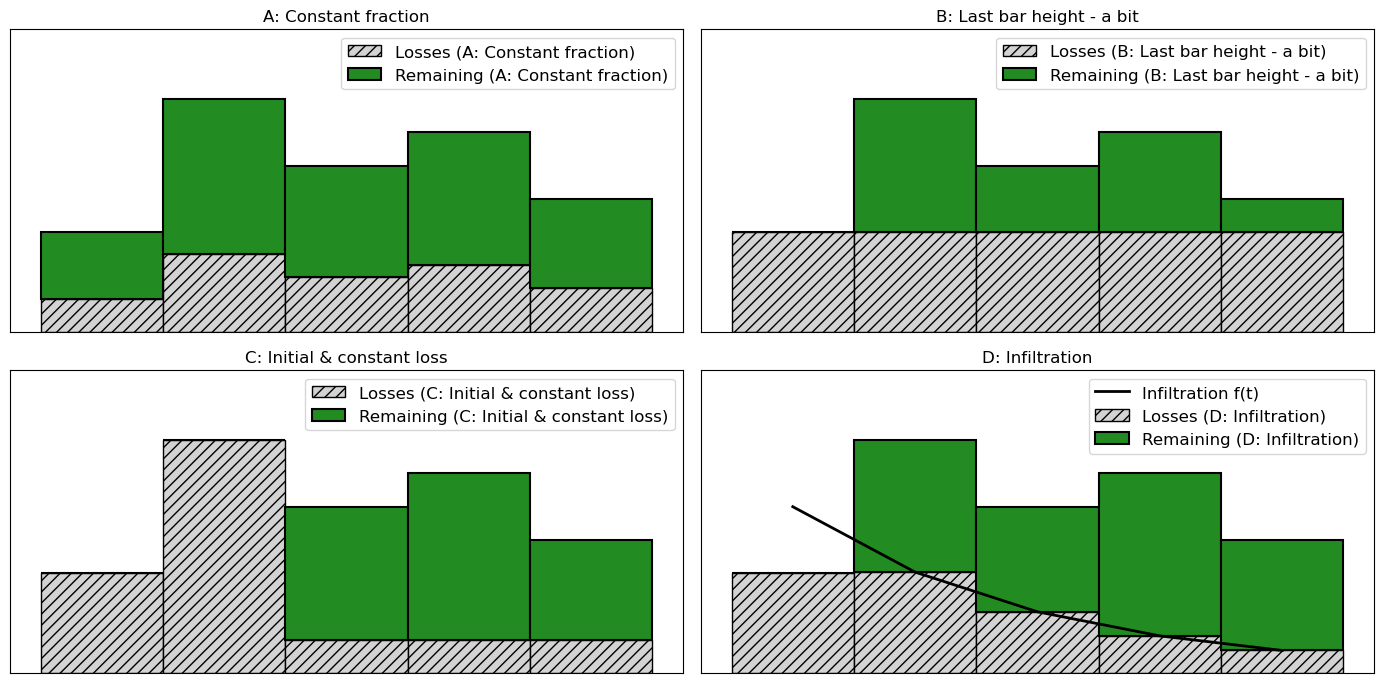

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1) SAME TOTAL PRECIPITATION FOR ALL SCENARIOS
# ----------------------------------------------------
time = np.arange(1, 6)                   
precip = np.array([3, 7, 5, 6, 4])       

# ----------------------------------------------------
# 2) DEFINE LOSSES FOR EACH SCENARIO (A, B, C, D)
# ----------------------------------------------------

# A) Constant fraction (e.g., 1/3 lost)
fraction_A = 1/3
losses_A = fraction_A * precip

# B) All losses = (height of last bar) - a small bit
#    Here, last bar's height is 4, so we choose 3.8, which is
#    slightly bigger than bar #1's 3 by an obvious amount.
loss_b_value = precip[-1] - 0.2  # 4 - 0.2 = 3.8
losses_B = np.full_like(precip, loss_b_value)

# C) First two bars 100% lost, then 30% lost afterward
losses_C = np.zeros_like(precip)
for i in range(len(precip)):
    if i < 2:
        losses_C[i] = precip[i]  # 100% loss for first two bars
    else:
        losses_C[i] = 0.3 * precip[i]  # 30% loss afterward

# D) Infiltration function
t_infil = np.arange(1, len(time) + 1)
f_t = 5 * np.exp(-0.5 * (t_infil - 1))
losses_D = np.minimum(precip, f_t)

# ----------------------------------------------------
# 3) HELPER FUNCTION: PLOT ONE SCENARIO
# ----------------------------------------------------
def plot_scenario(ax, label_text, losses, show_infiltration=False):
    leftover = precip - losses
    
    # Losses portion (bottom)
    ax.bar(
        time, 
        losses,
        width=1.0,
        color="lightgray",
        hatch="///",
        edgecolor="black",
        label=f"Losses ({label_text})"
    )
    # Non-lost portion (top)
    ax.bar(
        time, 
        leftover,
        bottom=losses,
        width=1.0,
        color="forestgreen",
        edgecolor="black",
        linewidth=1.5,
        label=f"Remaining ({label_text})"
    )
    # Optional: infiltration curve for scenario D
    if show_infiltration:
        ax.plot(time, f_t, "k-", linewidth=2, label="Infiltration f(t)")

    ax.set_title(label_text, fontsize=12)
    # Make the axes "abstract": remove numeric ticks, labels, etc.
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_ylim(0, 1.3 * precip.max())
    ax.legend(loc="upper right")

# ----------------------------------------------------
# 4) CREATE A 2×2 FIGURE (BIGGER SIZE)
# ----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
(axA, axB), (axC, axD) = axes

plot_scenario(axA, "A: Constant fraction", losses_A)
plot_scenario(axB, "B: Last bar height - a bit", losses_B)
plot_scenario(axC, "C: Initial & constant loss", losses_C)
plot_scenario(axD, "D: Infiltration", losses_D, show_infiltration=True)

plt.tight_layout()
plt.show();

```{figure} ../images/RFR_processes_precipi4losses.png
---
height: 0px
name: verliesfunctiesenafvoerbareneerslag
---
Four different concepts to account for losses during runoff from precipitation – photo from {cite:p}`instropicsEVA`. 
```



Each graph in {numref}`verliesfunctiesenafvoerbareneerslag` represents a different concept:
- A: In this case, the loss is a constant fraction of the rainfall intensity, for example 1/3 part.
- B: This concept assumes a constant loss intensity, where only the rainfall above this intensity contributes to runoff.
- C: This graph is similar to B, but there is a specific loss capacity that must be satisfied before runoff occurs.
- D: Here, an infiltration function is used to represent the variation of loss intensity over time. Only the rainfall above this curve contributes to runoff. An infiltration function like this can be determined, for example, using the Horton equation (equation ...).

Of course, combinations of the above functions are also possible, such as $A$ and $C$.

```{note}
Initially, it was stated that the loss intensity decreases over time, which only function $D$ would comply with. However, during intermediate periods with lower rainfall intensities, some recovery of the potential loss intensity may occur. Therefore, the remaining concepts can still have practical utility.
```

### Antecedent wetness of a catchment
In addition to the amount and duration of rainfall and the topographic and geographic characteristics of an area, the prior weather conditions are of great importance in determining the amount of precipitation that can result in fast runoff. This factor can cause significant variations in runoff patterns under similar rainfall conditions. The prior weather conditions are reflected in the moisture condition of an area.

If it has been raining continuously for a long period, the soil will be more or less saturated and unable to absorb much water; the soil pores are nearly filled. As a result, the rainfall will runoff relatively quickly, leading to high discharge peaks.

On the other hand, a heavy downpour following a prolonged dry period will have little effect, in case the infiltration capacity is high and the area is fairly flat.

In [56]:
# Note that the code cells below is used for the website only.
from jupyterquiz import display_quiz

```{exercise-start}
:label: mc_runoff_proc
```
Are the following statements true or false?


```{exercise-end}
```

In [57]:
q1 = [{
        "question": "True or false? During dry periods, the baseflow is maintained by the runoff component rapid subsurface flow.",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "True",
                "correct": False,
                "feedback": "Incorrect! The term rapid subsurface flow is used when water infiltrates, quickly percolates through the presence of macropores, and enters a temporarily saturated subsurface layer, allowing it to rapidly flow towards a watercourse. This discharge process is relatively fast and can thus only be observed relatively soon after a rain event. The baseflow is sustained by the depletion of one or more storage forms, such as (deep) groundwater, surface waters and snow accumulation."
            },
            {
                "answer": "False",
                "correct": True
            }
        ]
    }
]
display_quiz(q1)

<IPython.core.display.Javascript object>

In [58]:
q2 = [{
        "question": "True or false? In an ephemeral river, the groundwater level is always above the riverbed.",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "True",
                "correct": False,
                "feedback": "Incorrect! An ephemeral river is defined as a river that only flows after heavy rainfall. If the groundwater level was always above the riverbed, there would be a constant flow in that river, making it non-ephemeral by definition."
            },
            {
                "answer": "False",
                "correct": True
            }
        ]
    }]

display_quiz(q2)

<IPython.core.display.Javascript object>

In [59]:
q3 = [{
        "question": "True or false? Hortonian overland flow occurs when the groundwater level has risen to the surface.",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "True",
                "correct": False,
                "feedback": "Incorrect! Hortonian overland flow occurs when the intensity of rainfall exceeds the infiltration capacity, which does not mean that the groundwater level has risen to the surface. This results in the formation of a thin sheet of water on the surface, causing water to run off over the surface."
            },
            {
                "answer": "False",
                "correct": True
            }
        ]
    }]

display_quiz(q3)

<IPython.core.display.Javascript object>

In [60]:
q4 = [{
        "question": "True or false? A river year is chosen in such a way that the differences between the storage in the beginning and the end of the year are smallest.",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "True",
                "correct": True
            },
            {
                "answer": "False",
                "correct": False,
                "feedback": "Incorrect! In hydrology, a river year is chosen to minimize differences in storage between the start and end of the year to ensure that any changes in water flow and storage are primarily due to natural hydrological processes like rainfall and runoff, rather than storage variations. This makes it easier to analyze and compare water flow patterns across different years."
            }
        ]
    }]

display_quiz(q4)

<IPython.core.display.Javascript object>

In [61]:
q5 = [{
        "question": "True or false? After a shower with a high antecedent precipitation index, the precipitation will run off more rapidly than after a similar shower with a low antecedent precipitation index.",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "True",
                "correct": True
            },
            {
                "answer": "False",
                "correct": False,
                "feedback": "Incorrect! A high antecedent precipitation index indicates that the soil is already saturated from previous rainfall, so it has less capacity to absorb additional water. As a result, precipitation from a subsequent shower will run off more quickly compared to when the soil is drier (low antecedent precipitation index), where more water can infiltrate before runoff occurs."
            }
        ]
    }]
display_quiz(q5)

<IPython.core.display.Javascript object>